# Data Science 101 for Python

## Statistical Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
# Create more data
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,-1)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,-1)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,-1,1,-1,0.012107
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,-1,-1,-1,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,-1,-1,1,-0.021531


## Measuring Central Tendency

In [4]:
print("Mean Values in the Distribution")
print("-"*35)
print(dataset.mean())
print("***********************************")
print("Median Values in the Distribution")
print("-"*35)
print(dataset.median())

Mean Values in the Distribution
-----------------------------------
Open                 8.169578e+00
High                 8.358266e+00
Low                  7.972641e+00
Close                8.167780e+00
Adj Close            8.167780e+00
Volume               4.353071e+07
Increase_Decrease   -8.989658e-02
Buy_Sell_on_Open     1.193317e-02
Buy_Sell            -3.977725e-03
Returns              1.971264e-03
dtype: float64
***********************************
Median Values in the Distribution
-----------------------------------
Open                        5.10
High                        5.19
Low                         5.00
Close                       5.10
Adj Close                   5.10
Volume               31793700.00
Increase_Decrease          -1.00
Buy_Sell_on_Open            1.00
Buy_Sell                   -1.00
Returns                     0.00
dtype: float64


In [5]:
print("Mode Value")
print(dataset.mode())

Mode Value
   Open  High   Low  Close  Adj Close    Volume  Increase_Decrease  \
0  2.36   2.8  2.65   2.28       2.28  11839300               -1.0   
1   NaN   NaN   NaN    NaN        NaN  34758600                NaN   

   Buy_Sell_on_Open  Buy_Sell  Returns  
0               1.0      -1.0      0.0  
1               NaN       NaN      NaN  


## Measuring Variance

In [6]:
# Measuring Standard Deviation
print("Measuring Standard Deviation")
print(dataset.std())

Measuring Standard Deviation
Open                 6.482962e+00
High                 6.659404e+00
Low                  6.280754e+00
Close                6.476459e+00
Adj Close            6.476459e+00
Volume               4.088962e+07
Increase_Decrease    9.963475e-01
Buy_Sell_on_Open     1.000327e+00
Buy_Sell             1.000390e+00
Returns              3.921139e-02
dtype: float64


In [7]:
# Measuring Skewness
print("Measuring Skewness")
print(dataset.skew())

Measuring Skewness
Open                 1.261225
High                 1.280989
Low                  1.227398
Close                1.256451
Adj Close            1.256451
Volume               2.080052
Increase_Decrease    0.180740
Buy_Sell_on_Open    -0.023897
Buy_Sell             0.007965
Returns              1.814307
dtype: float64


## Normal Distribution

In [8]:
import math
import matplotlib.mlab as mlab

# Define Variables
mu = dataset['Returns'].mean() # Mean Returns
sigma = dataset['Returns'].std() # Volatility

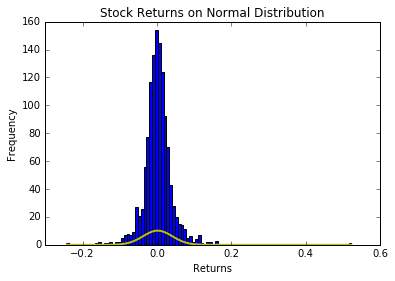

In [9]:
[n,bins,patches] = plt.hist(dataset['Returns'], 100)
# Daily returns using normal distribution
s = mlab.normpdf(bins, mu, sigma)
# Create the bins and histogram
plt.plot(bins, s, color='y', lw=2)
plt.title("Stock Returns on Normal Distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

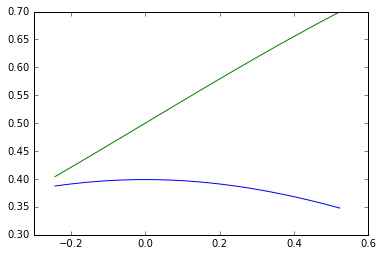

In [10]:
from scipy.stats import norm

mu = dataset['Returns'].mean()
sigma = dataset['Returns'].std()

x_min = dataset['Returns'].min()
x_max = dataset['Returns'].max()



def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    x = x_range
    if cdf:
        y = norm.cdf(x, mu, sigma)
    else:
        y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)
    
x = np.linspace(x_min, x_max, 100)
plot_normal(x)
plot_normal(x, cdf=True)

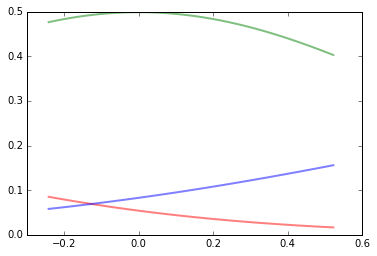

In [11]:
plot_normal(x, -2, 1, color='red', lw=2, ls='-', alpha=0.5)
plot_normal(x, 2, 1.2, color='blue', lw=2, ls='-', alpha=0.5)
plot_normal(x, 0, 0.8, color='green', lw=2, ls='-', alpha=0.5)

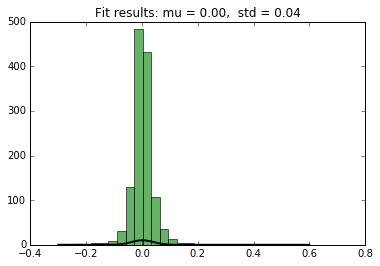

In [12]:
mu, std = norm.fit(dataset['Returns'])

# Plot the histogram.
plt.hist(dataset['Returns'], bins=25, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Gamma Distribution

In [26]:
from scipy import stats

# input
symbol = 'AAPL'
market = 'SPY'
start = '2014-01-01'
end = '2018-01-01'

# Read data 
dataset1 = yf.download(symbol,start,end)
dataset2 = yf.download(market,start,end)

stock_ret = dataset1['Adj Close'].pct_change().dropna()
mkt_ret = dataset2['Adj Close'].pct_change().dropna()

beta, alpha, r_value, p_value, std_err = stats.linregress(mkt_ret, stock_ret)
print(beta, alpha)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
1.06902764917 0.000487690199643


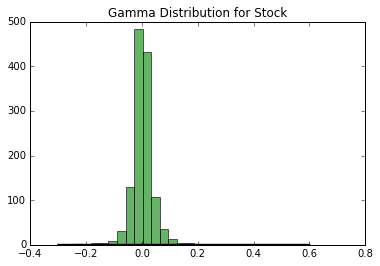

In [27]:
from scipy.stats import gamma

mu, std = gamma.stats(dataset['Returns'])

# Plot the histogram.
plt.hist(dataset['Returns'], bins=25, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1171)
p = gamma.pdf(x, alpha, scale=1/beta)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Gamma Distribution for Stock")

plt.show()

## Binomial Distribution

In [15]:
from scipy.stats import binom

n = 10 # number of trials
p = 0.5 # probaility of success and failure
k = np.arange(0,21) # * number of repeat the trial
binomial = binom.pmf(k, n, p)
binomial 

array([ 0.00097656,  0.00976563,  0.04394531,  0.1171875 ,  0.20507813,
        0.24609375,  0.20507813,  0.1171875 ,  0.04394531,  0.00976563,
        0.00097656,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

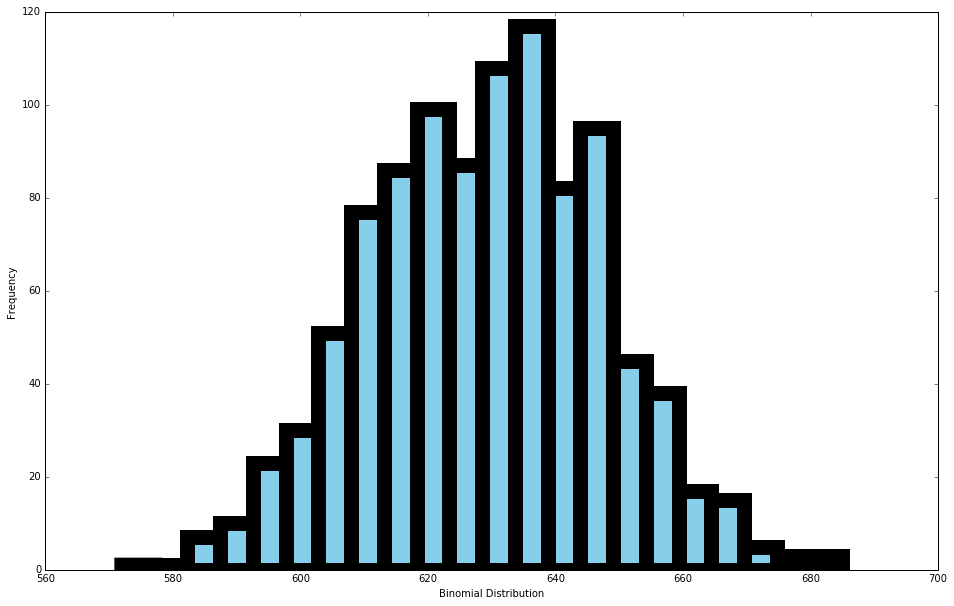

In [32]:
data_binom = binom.rvs(n=len(dataset['Adj Close']),p=0.5,size=1000)

plt.figure(figsize=(16,10))
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

## Poisson Distribution

Mean: 0.00197126
SD: 0.0392114


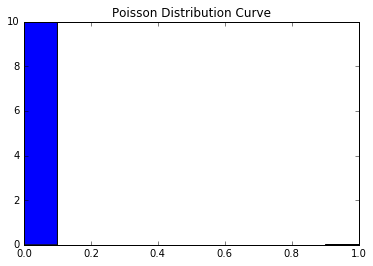

In [16]:
from scipy.stats import poisson

mu = dataset['Returns'].mean()
dist = poisson.rvs(mu=mu, loc=0, size=1000)
print("Mean: %g" % np.mean(dataset['Returns']))
print("SD: %g" % np.std(dataset['Returns'], ddof=1))

plt.hist(dist, bins=10, normed=True)
#plt.xlabel()
plt.title('Poisson Distribution Curve')
plt.show()

## Bernoulli Distribution

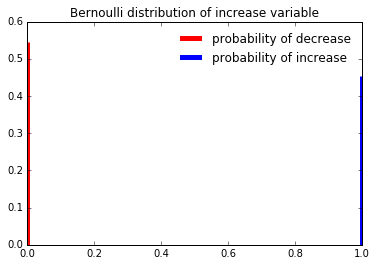

In [17]:
from scipy.stats import bernoulli

countIncrease = dataset[dataset.Increase_Decrease == 1].Increase_Decrease.count()
countAll = dataset.Increase_Decrease.count()

Increase_dist = bernoulli(countIncrease / countAll)
# the given value is the probability of outcome 1 (increase) (let's call it p). # The probability of the opposite outcome (0 - decrease) is 1 - p.

_, ax = plt.subplots(1, 1)
ax.vlines(0, 0, Increase_dist.pmf(0), colors='r', linestyles='-', lw=5, label="probability of decrease")
ax.vlines(1, 0, Increase_dist.pmf(1), colors='b', linestyles='-', lw=5, label="probability of increase")
ax.legend(loc='best', frameon=False)
plt.title("Bernoulli distribution of increase variable")
plt.show()

## Exponential Distribution

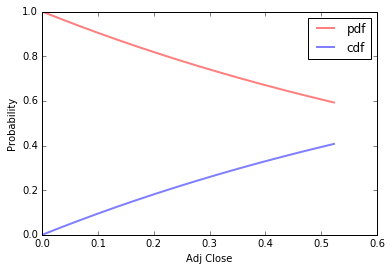

In [18]:
from scipy.stats import expon

mu = dataset['Returns'].mean()
sigma = dataset['Returns'].std()

x_m = dataset['Returns'].max()

def plot_exponential(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    if cdf:
        y = expon.cdf(x, mu, sigma)
    else:
        y = expon.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)
    

x = np.linspace(0, x_m, 5000)
plot_exponential(x, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_exponential(x, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.xlabel('Adj Close')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.show()

# Discrete random variable

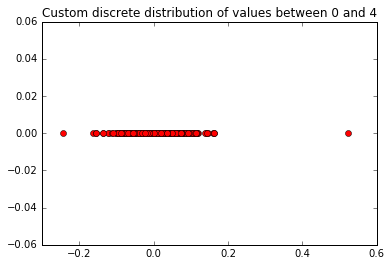

In [19]:
from scipy.stats import rv_discrete

increase_probability = pd.DataFrame({'probability': dataset.groupby(by = "Increase_Decrease", as_index=False).size() / dataset.Increase_Decrease.count()}).reset_index()

values = increase_probability.Increase_Decrease
probabilities = increase_probability.probability
custom_discrete_dist = rv_discrete(values=(values, probabilities))

x = dataset['Returns']

_, ax = plt.subplots(1, 1)
ax.plot(x, custom_discrete_dist.pmf(x), 'ro', lw=2)
plt.title('Custom discrete distribution of values between 0 and 4')
plt.show()

## P-Value

In [20]:
from scipy import stats

# input
symbol = 'AAPL'
market = 'SPY'
start = '2014-01-01'
end = '2018-01-01'

# Read data 
dataset1 = yf.download(symbol,start,end)
dataset2 = yf.download(market,start,end)

stock_ret = dataset1['Adj Close'].pct_change().dropna()
mkt_ret = dataset2['Adj Close'].pct_change().dropna()

beta, alpha, r_value, p_value, std_err = stats.linregress(mkt_ret, stock_ret)
print(beta, alpha)
print("R-squared=", r_value**2)
print("p-value =", p_value)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
1.06902764917 0.000487690199643
R-squared= 0.32122047131
p-value = 1.49445000812e-86


In [21]:
if p_value < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


## Correlation

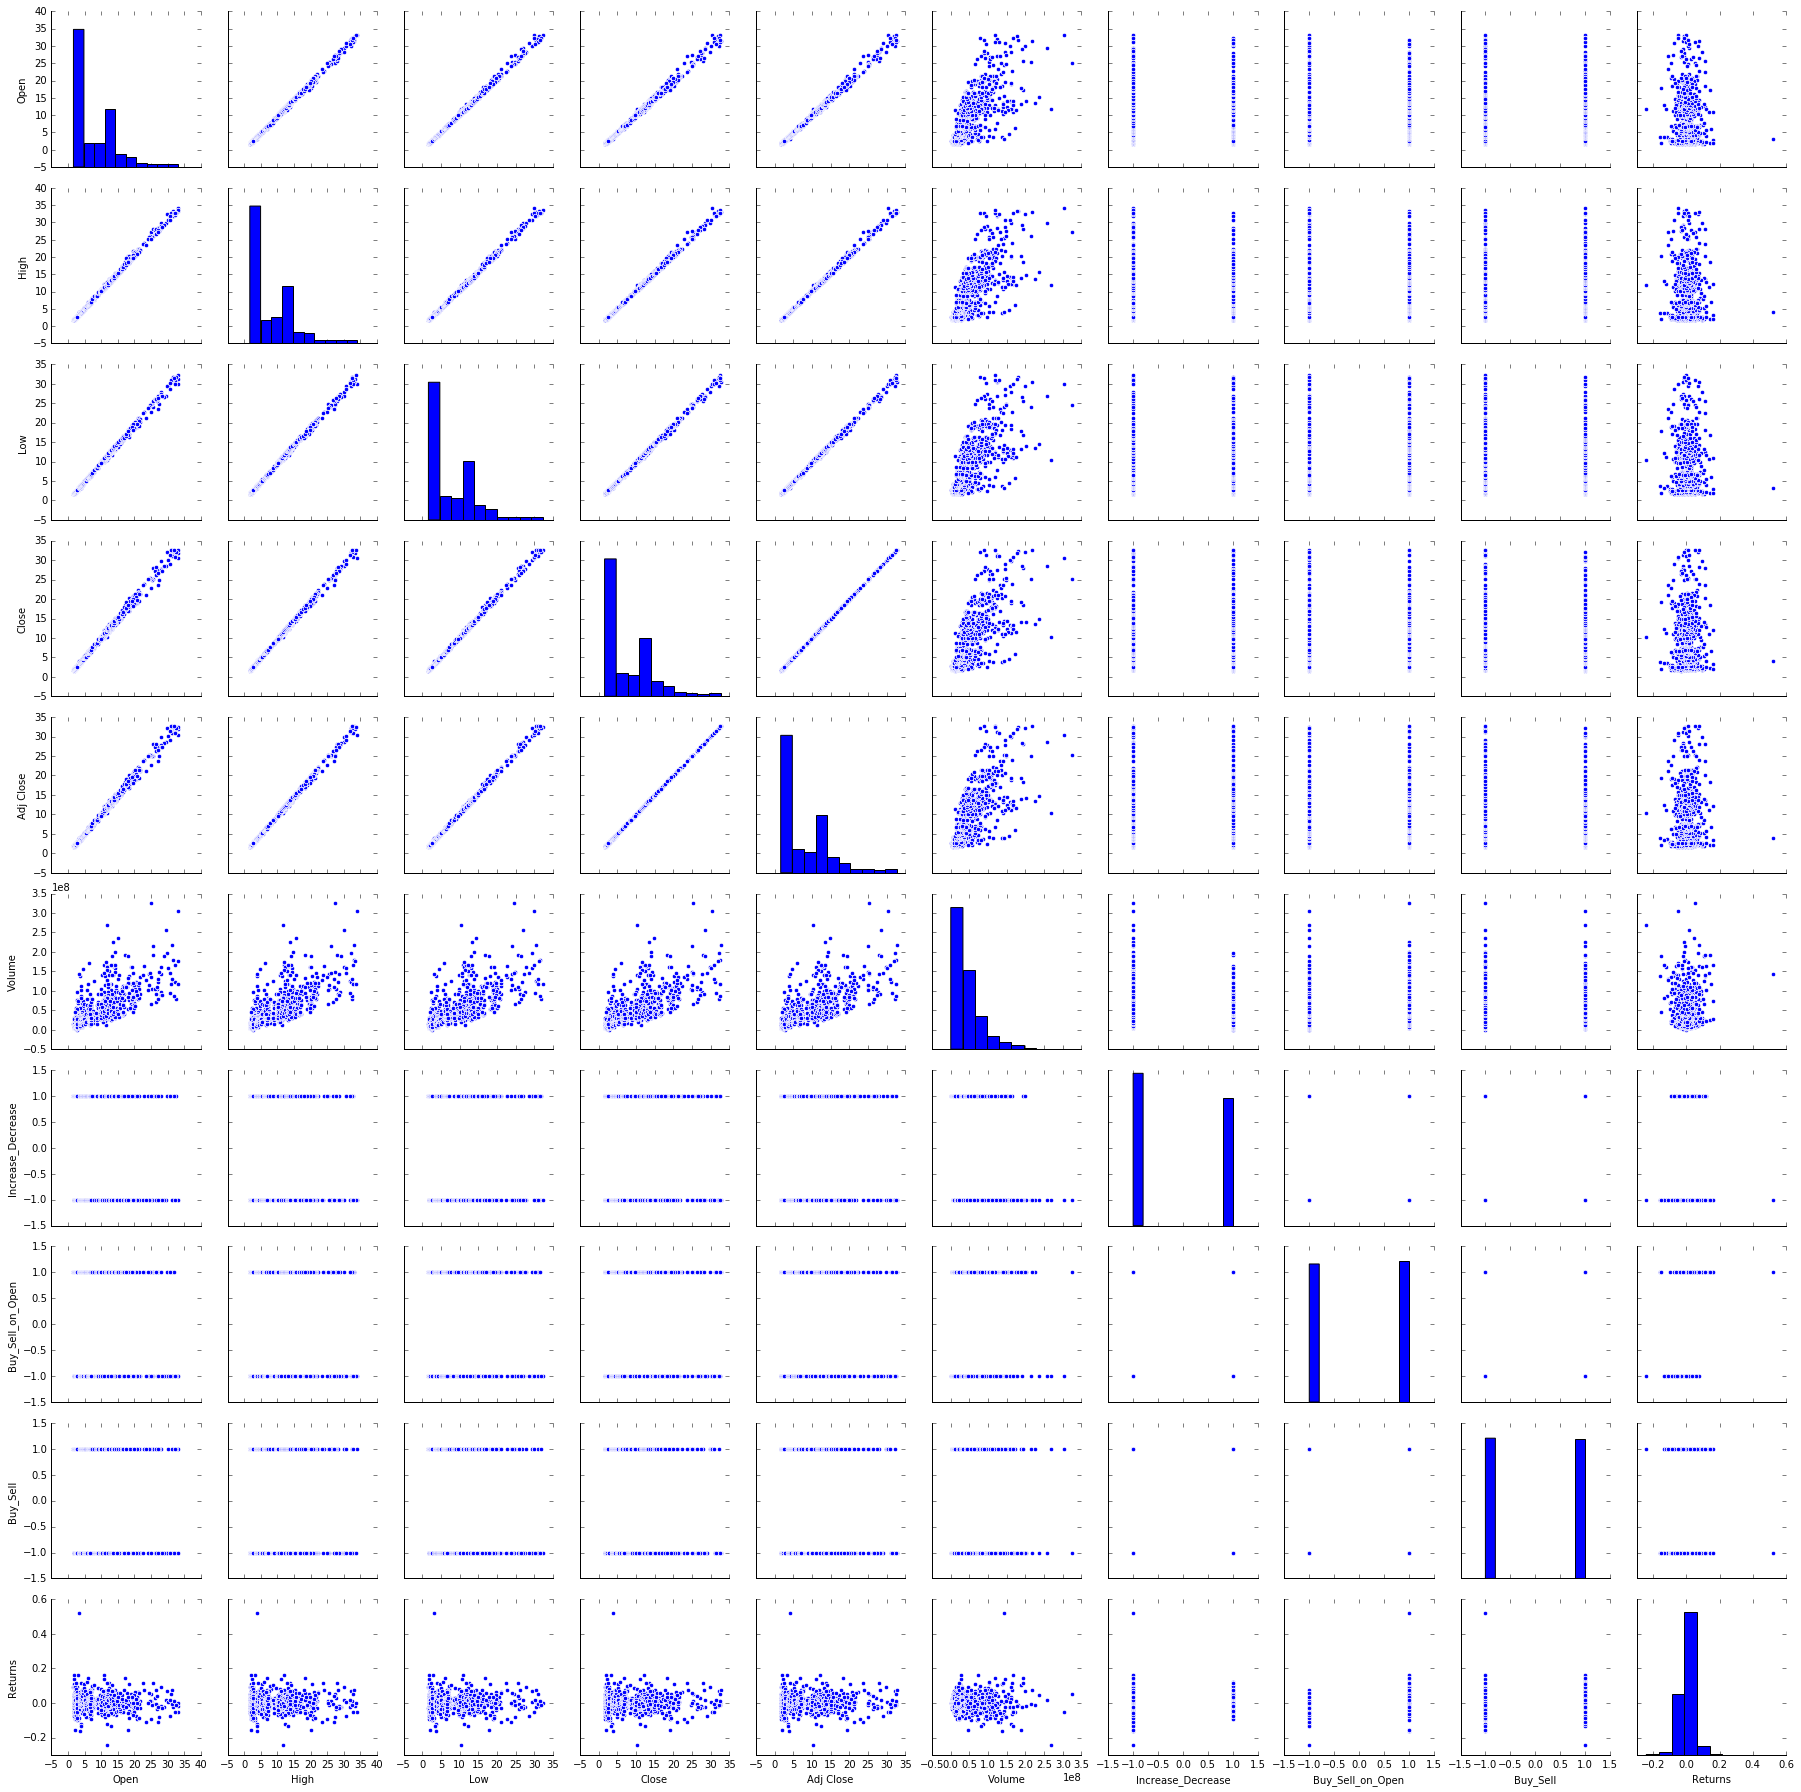

In [22]:
sns.pairplot(dataset, kind="scatter")
plt.show()

# Chi-square Test

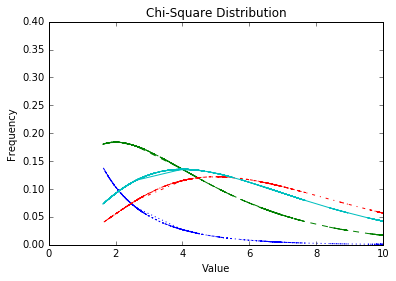

In [23]:
from scipy import stats

x = dataset['Adj Close']
fig,ax = plt.subplots(1,1)

linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 4, 7, 6]
for df, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.chi2.pdf(x, df), linestyle=ls)

plt.xlim(0, 10)
plt.ylim(0, 0.4)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Chi-Square Distribution')

plt.legend()
plt.show()

## Linear Regression

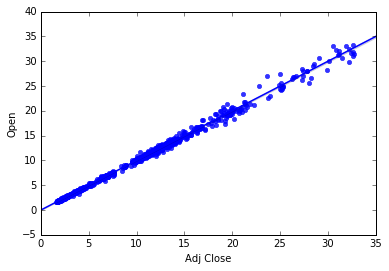

In [24]:
sns.regplot(x = "Adj Close", y = "Open", data = dataset)
plt.show()